# Project 1

## Task 1

The project goal is to be able to predict whether or not a tumor is malignant or benign.  Logistic regression is the best choice for this problem because the prediction involves a binary classification of whether or not a tumor is cancerous.    


## Task 2

Dataset link: https://www.kaggle.com/datasets/marshuu/breast-cancer/data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

In [7]:
#advance apology if I use an obnoxious amount of comments
#this is my first time writing AI anything so I need to explain things to myself
# df = pd.read_csv('breast_cancer.csv')




In [8]:
#for use only in colab bc I don't know how else to get it m=to read my csv file
url = 'https://raw.githubusercontent.com/kismet37/Logistic-Regression-Project/main/breast_cancer.csv'
df = pd.read_csv(url)

Data Dictionary

Variable       | Definition                                | Key
---------------|-------------------------------------------|------
Clump Thickness|How thick the cells are within a tumor     |(1-10)
Uniformity of Cell Size|How similar the cells are in size |(1-10)
Uniformity of Cell Shape|How similar the cells are in shape|(1-10)
Marginal Adhesion|How much the cells stick together (loss of adhesion can indicate a cancerous cell)|(1-10)
Single Epithelial Cell Size|Size of individual cells in an epithelial tissue sample | (1-10)
Bare Nuclei | Cells that are missing their cell membranes and cytoplasm | (1-10)
Bland Chromatin | Texture of the nucleus, uniform for benign and coarse for malignant |(1-10)
Normal Nucleoli| Size of the nucleoli in the cell (become larger in cancerous cells)|(1-10)
Mitoses|Estimated number of mitoses in the cell (cancerous cells will have higher numbers)|(1-10)
Class | Whether a cell is benign or malignant | 2 = benign, 4 = malignant




In [9]:
# viewing the first few rows of the data
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [10]:
#shape of the dataset
df.shape

(683, 10)

In [11]:
#number of cells not filled in each column
#This is a clean dataset so it's not missing any values, but if it were I would approach fixing them by taking the average of that feature category.
df.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [12]:
# general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [13]:
# statistics of the dataset
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [14]:
# checking for imbalance
df.Class.value_counts(normalize=True) #normalizes the result

2    0.650073
4    0.349927
Name: Class, dtype: float64

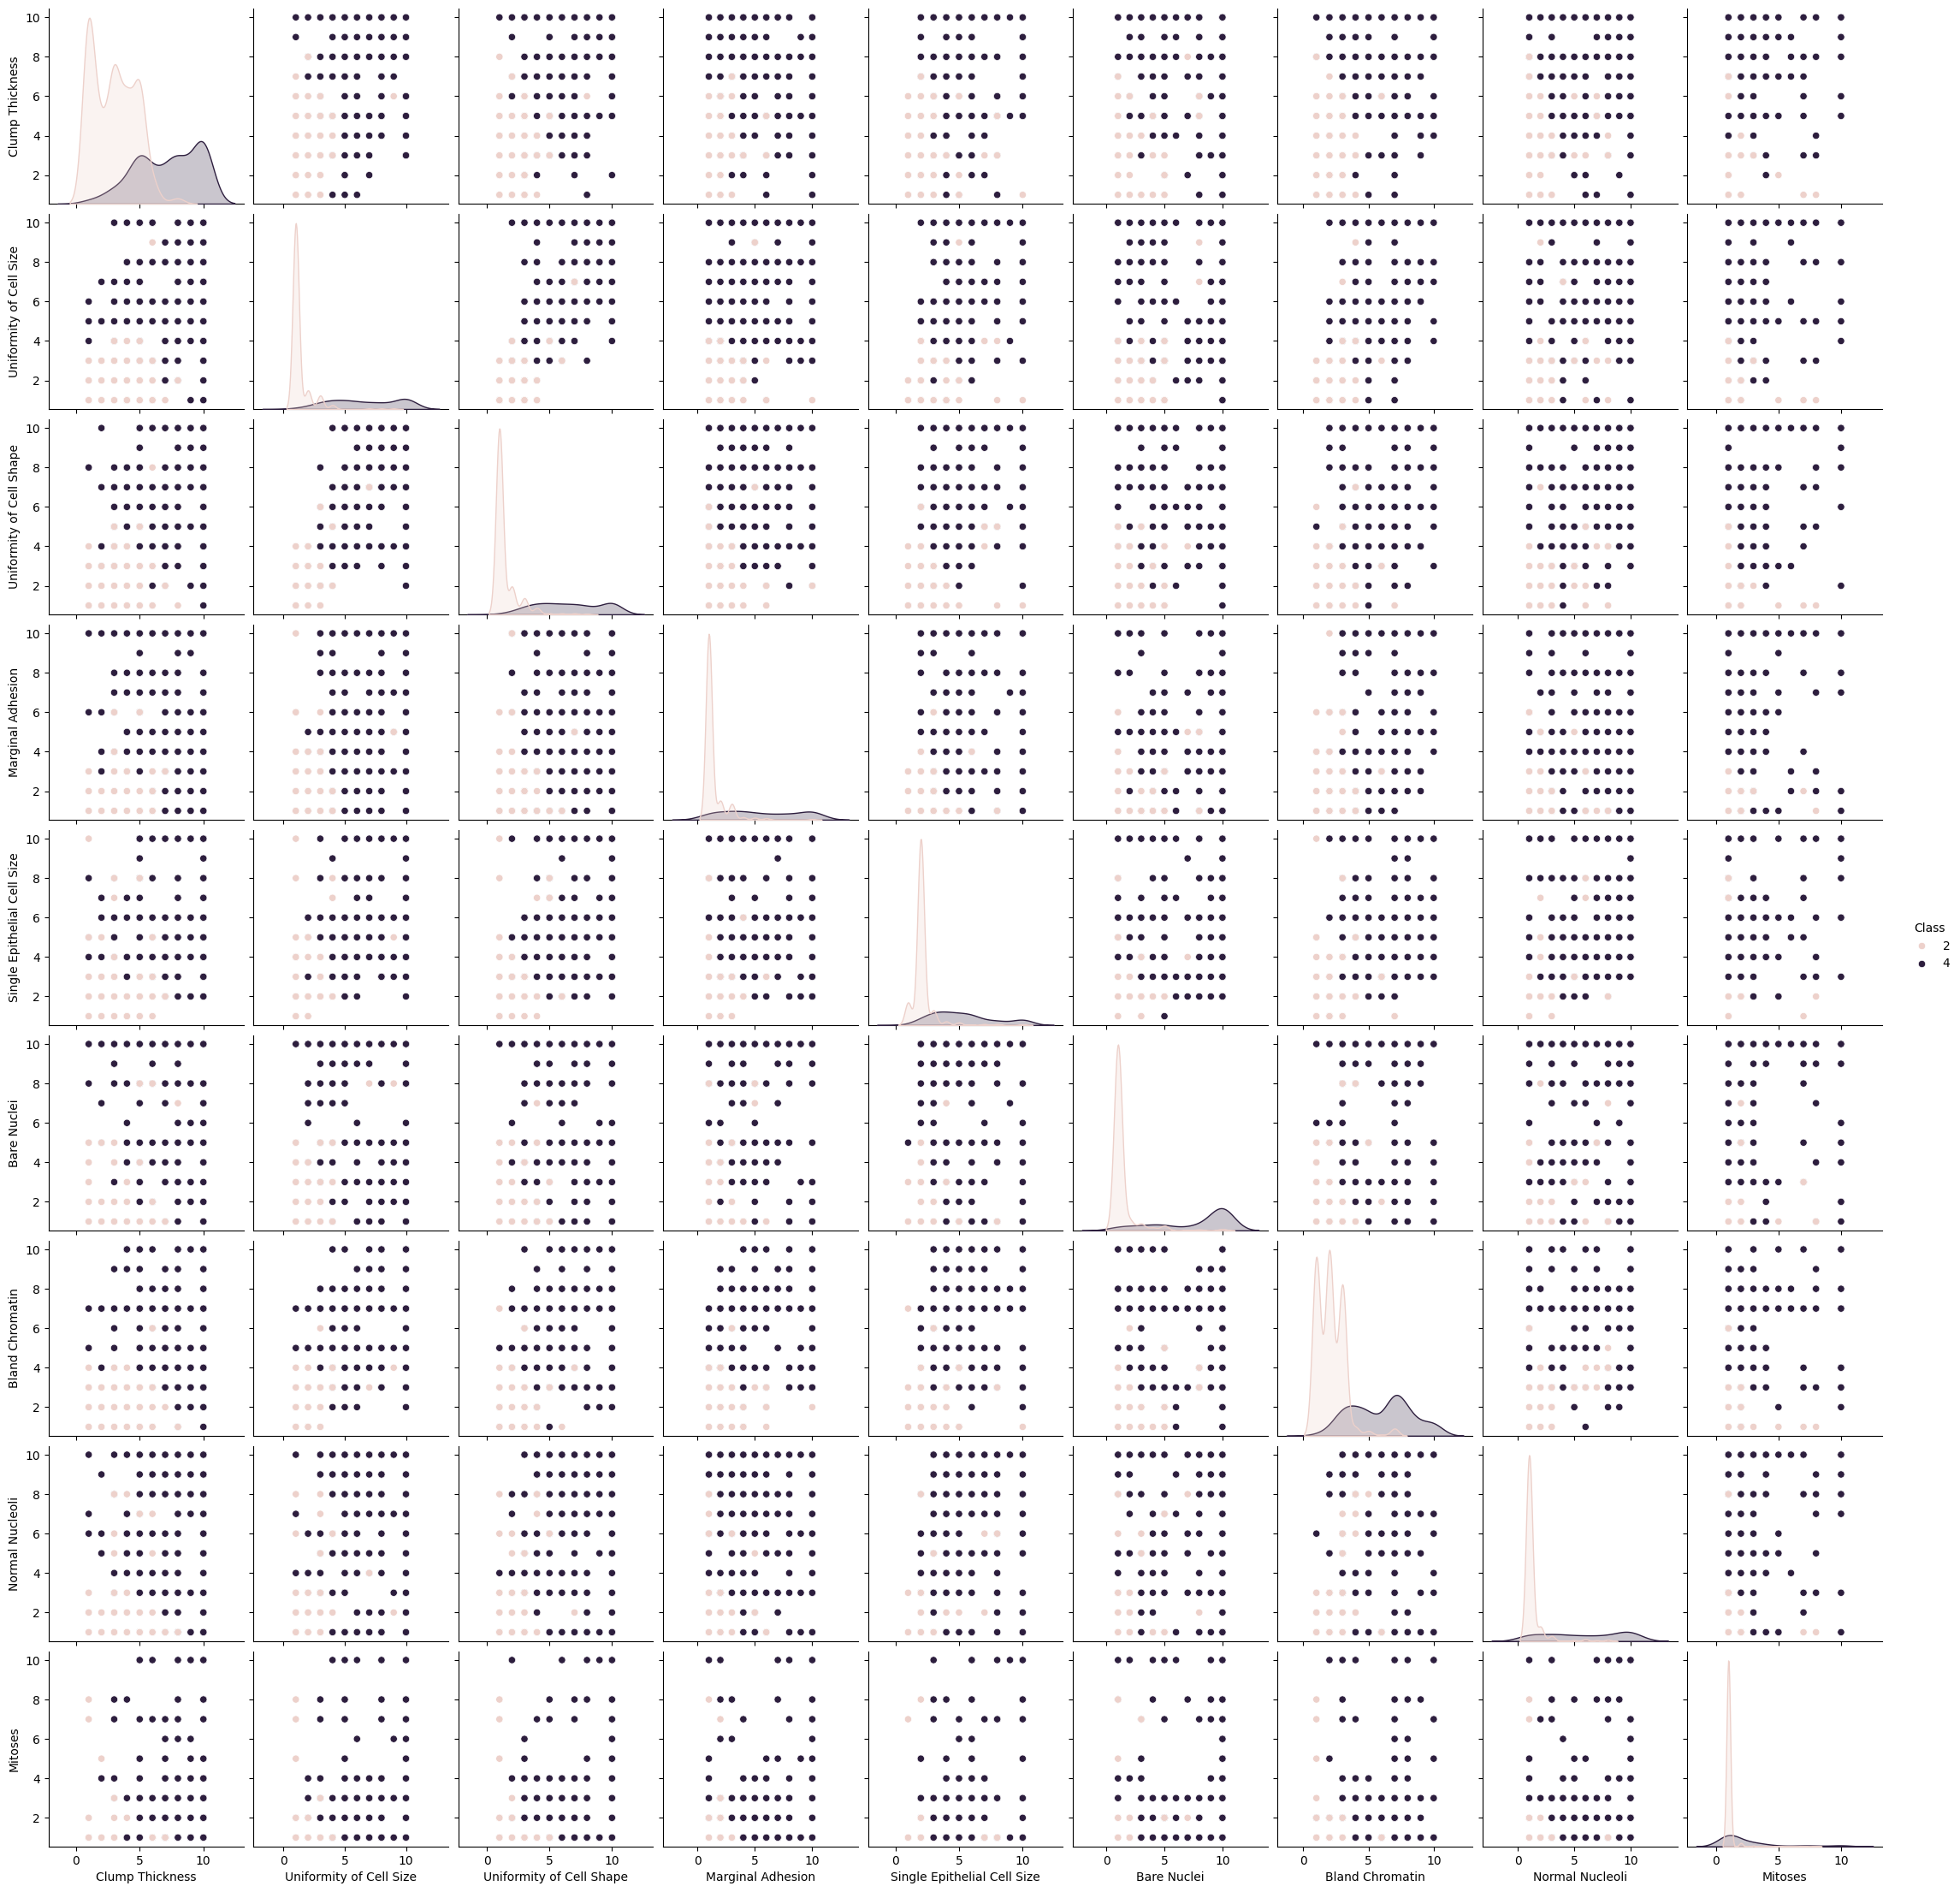

In [15]:
# plotting pairwise relationships in the dataset to look at how the features correlate with Class.
sns.pairplot(df, hue='Class')

<Axes: >

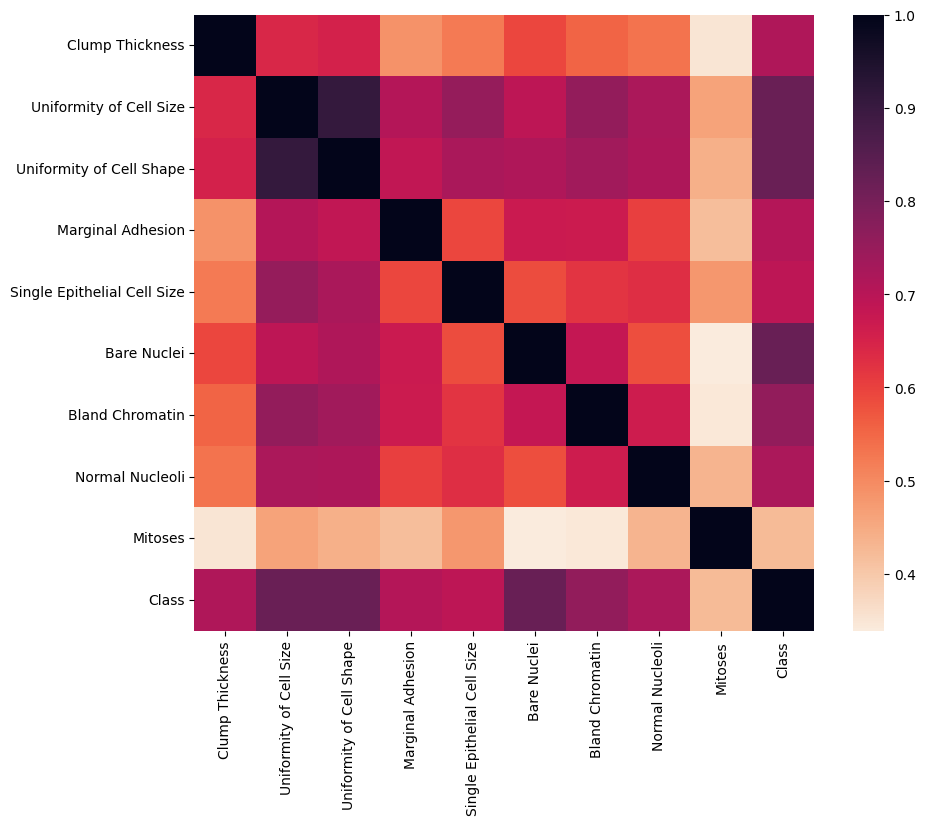

In [16]:
#correlation matrix
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr().abs(),annot=False, ax=ax, cmap='rocket_r')

In [17]:
# feature correlation with Class
df.corr()['Class'].sort_values(ascending=False)

Class                          1.000000
Bare Nuclei                    0.822696
Uniformity of Cell Shape       0.821891
Uniformity of Cell Size        0.820801
Bland Chromatin                0.758228
Normal Nucleoli                0.718677
Clump Thickness                0.714790
Marginal Adhesion              0.706294
Single Epithelial Cell Size    0.690958
Mitoses                        0.423448
Name: Class, dtype: float64

<Axes: xlabel='Mitoses'>

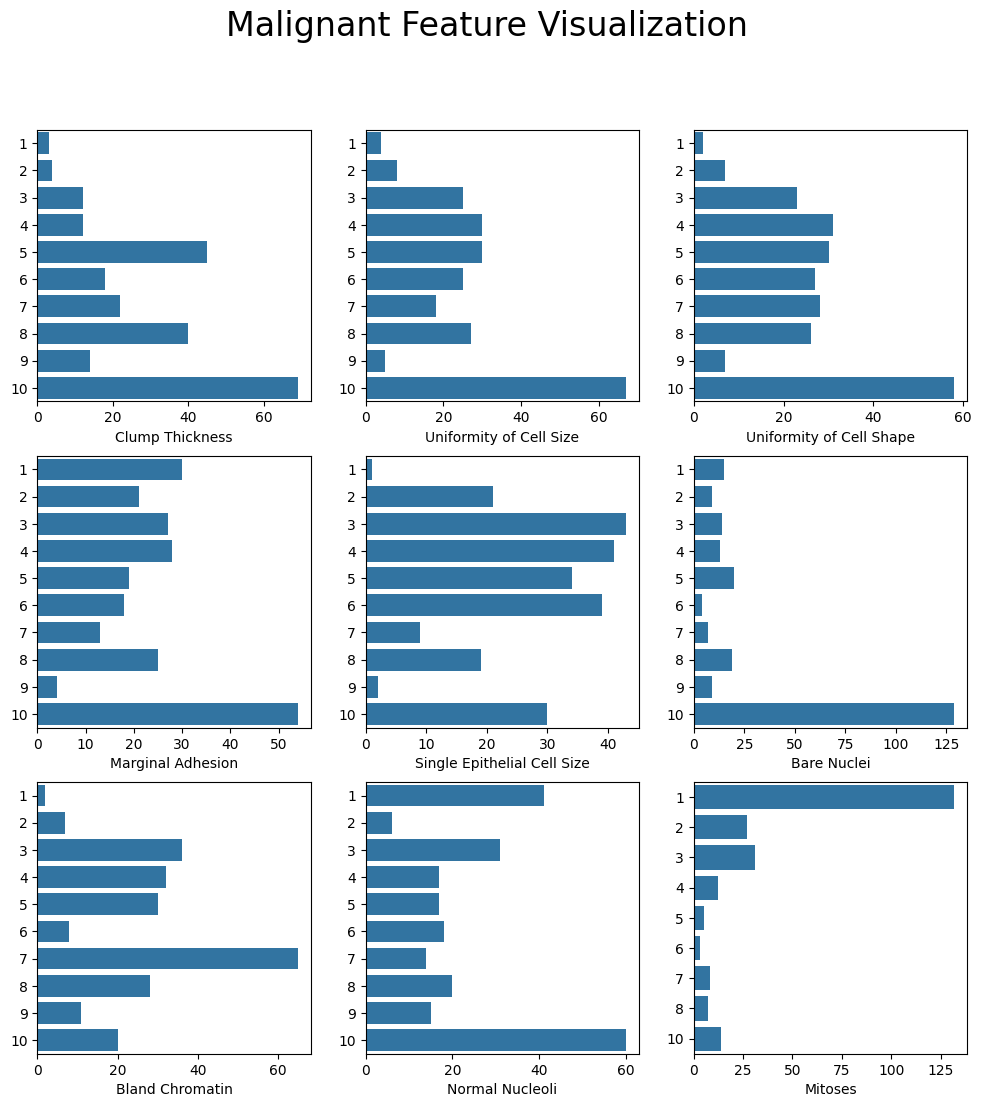

In [68]:
#Let's try to create some bar graphs that show the prevalence of the features in malignant tumors

plt.figure(figsize =(12, 12))
plt.suptitle("Malignant Feature Visualization", fontsize=24)
mal_subset = df.loc[df['Class'] == 4]

plt.subplot(3,3,1)
sns.barplot(mal_subset['Clump Thickness'].value_counts(), orient='h')

plt.subplot(3,3,2)
sns.barplot(mal_subset['Uniformity of Cell Size'].value_counts(), orient='h')

plt.subplot(3,3,3)
sns.barplot(mal_subset['Uniformity of Cell Shape'].value_counts(), orient='h')

plt.subplot(3,3,4)
sns.barplot(mal_subset['Marginal Adhesion'].value_counts(), orient='h')

plt.subplot(3,3,5)
sns.barplot(mal_subset['Single Epithelial Cell Size'].value_counts(), orient='h')

plt.subplot(3,3,6)
sns.barplot(mal_subset['Bare Nuclei'].value_counts(), orient='h')

plt.subplot(3,3,7)
sns.barplot(mal_subset['Bland Chromatin'].value_counts(), orient='h')

plt.subplot(3,3,8)
sns.barplot(mal_subset['Normal Nucleoli'].value_counts(), orient='h')

plt.subplot(3,3,9)
sns.barplot(mal_subset['Mitoses'].value_counts(), orient='h')

<Axes: xlabel='Mitoses'>

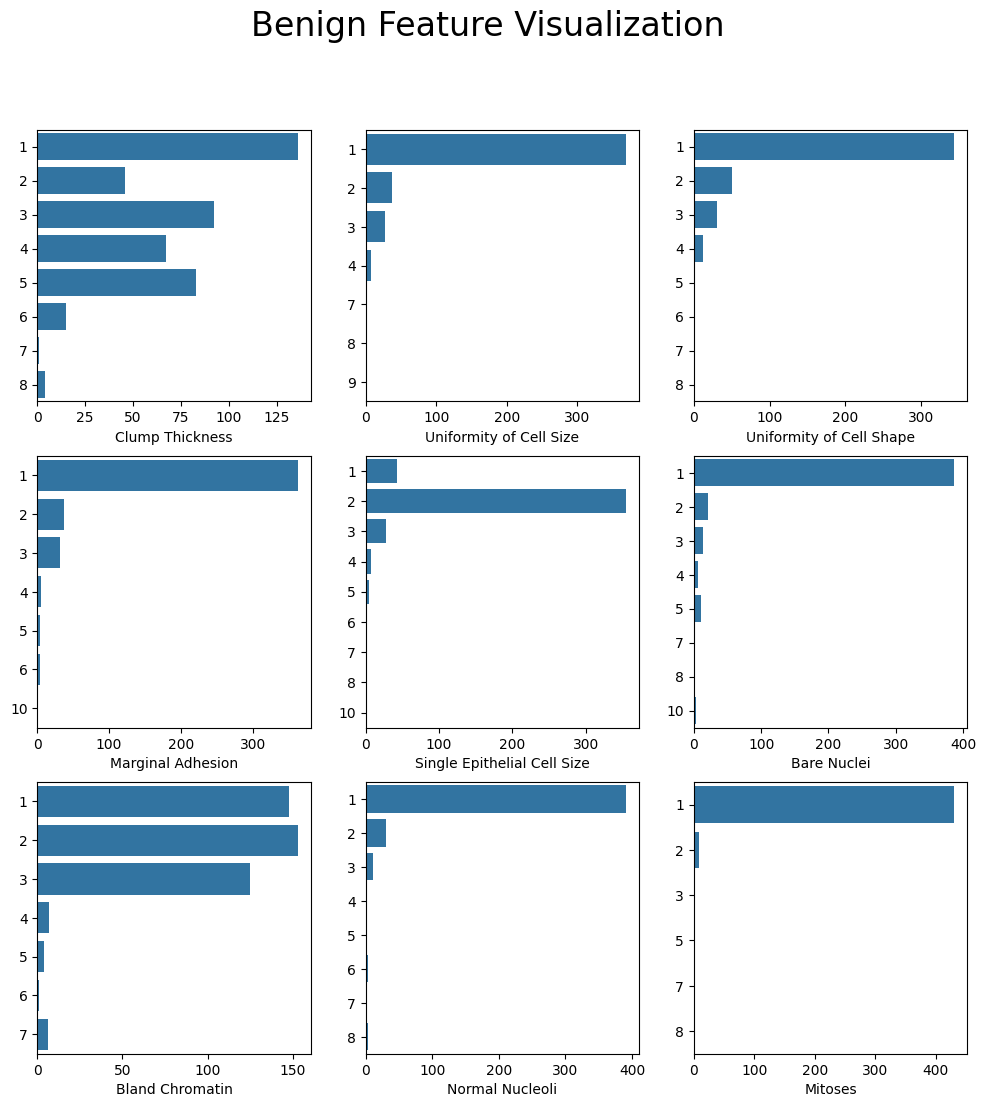

In [69]:
#and we'll do the same visualization with the benign class

plt.figure(figsize =(12, 12))
plt.suptitle("Benign Feature Visualization", fontsize=24)
ben_subset = df.loc[df['Class'] == 2]

plt.subplot(3,3,1)
sns.barplot(ben_subset['Clump Thickness'].value_counts(), orient='h')

plt.subplot(3,3,2)
sns.barplot(ben_subset['Uniformity of Cell Size'].value_counts(), orient='h')

plt.subplot(3,3,3)
sns.barplot(ben_subset['Uniformity of Cell Shape'].value_counts(), orient='h')

plt.subplot(3,3,4)
sns.barplot(ben_subset['Marginal Adhesion'].value_counts(), orient='h')

plt.subplot(3,3,5)
sns.barplot(ben_subset['Single Epithelial Cell Size'].value_counts(), orient='h')

plt.subplot(3,3,6)
sns.barplot(ben_subset['Bare Nuclei'].value_counts(), orient='h')

plt.subplot(3,3,7)
sns.barplot(ben_subset['Bland Chromatin'].value_counts(), orient='h')

plt.subplot(3,3,8)
sns.barplot(ben_subset['Normal Nucleoli'].value_counts(), orient='h')

plt.subplot(3,3,9)
sns.barplot(ben_subset['Mitoses'].value_counts(), orient='h')

We can see that the features that appear to correlate most strongly with Class are Bare Nuclei, and Uniformity of Cell Shape and Size.


Even though we have clean data, I'd like to check for outliers in the data using box plots.

Text(0, 0.5, 'Mitoses')

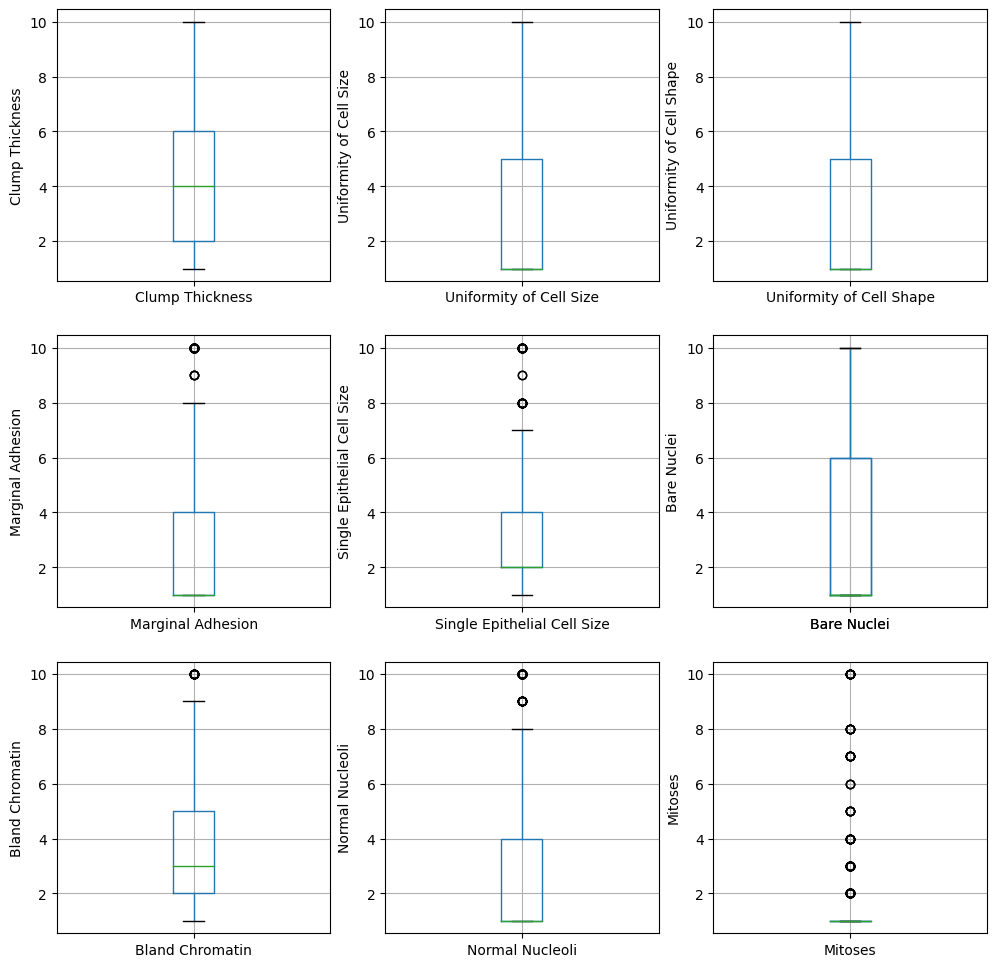

In [34]:
#boxplot attempt
#I'm trying to make a box plot for each feature
plt.figure(figsize =(12, 12))

plt.subplot(3,3,1)
figure = df.boxplot(column='Clump Thickness')
figure.set_ylabel('Clump Thickness')

plt.subplot(3,3,2)
figure = df.boxplot(column='Uniformity of Cell Size')
figure.set_ylabel('Uniformity of Cell Size')

plt.subplot(3,3,3)
figure = df.boxplot(column='Uniformity of Cell Shape')
figure.set_ylabel('Uniformity of Cell Shape')

plt.subplot(3,3,4)
figure = df.boxplot(column='Marginal Adhesion')
figure.set_ylabel('Marginal Adhesion')

plt.subplot(3,3,5)
figure = df.boxplot(column='Single Epithelial Cell Size')
figure.set_ylabel('Single Epithelial Cell Size')

plt.subplot(3,3,6)
figure = df.boxplot(column='Bare Nuclei')
figure.set_ylabel('Bare Nuclei')

plt.subplot(3,3,6)
figure = df.boxplot(column='Bare Nuclei')
figure.set_ylabel('Bare Nuclei')

plt.subplot(3,3,7)
figure = df.boxplot(column='Bland Chromatin')
figure.set_ylabel('Bland Chromatin')

plt.subplot(3,3,8)
figure = df.boxplot(column='Normal Nucleoli')
figure.set_ylabel('Normal Nucleoli')

plt.subplot(3,3,9)
figure = df.boxplot(column='Mitoses')
figure.set_ylabel('Mitoses')

There aren't many outliers, so we shouldn't need to worry about deleting any data points.  (??? I hope?)
